In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [4]:
company = pd.read_csv('Company_data.csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
company.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [6]:
company.Sales.max()

16.27

In [10]:
company['salescat'] = pd.cut(company.Sales,bins=[0,5,10,20],labels=["Low","Medium","High"])

In [11]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,salescat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Medium
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Medium
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Medium


In [12]:
data = company.iloc[:,1:]
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,salescat
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [15]:
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc']) 
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,salescat
0,138,73,11,276,120,0,42,17,Yes,Yes,Medium
1,111,48,16,260,83,1,65,10,Yes,Yes,High
2,113,35,10,269,80,2,59,12,Yes,Yes,High
3,117,100,4,466,97,2,55,14,Yes,Yes,Medium
4,141,64,3,340,128,0,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,Yes,Yes,High
396,139,23,3,37,120,2,55,11,No,Yes,Medium
397,162,26,12,368,159,2,40,18,Yes,Yes,Medium
398,100,79,7,284,95,0,50,12,Yes,Yes,Medium


In [16]:
data['Urban']= label_encoder.fit_transform(data['Urban']) 
data['US']= label_encoder.fit_transform(data['US']) 
data['salescat']= label_encoder.fit_transform(data['salescat']) 

In [17]:
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,salescat
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1


In [21]:
x = data.iloc[:,0:10]
y = data.iloc[:,10]

In [28]:
colnames = list(data.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'salescat']

In [29]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

In [30]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

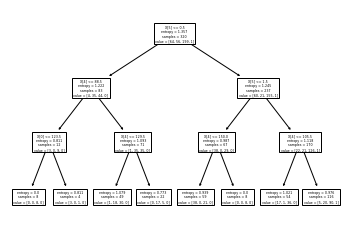

In [32]:
tree.plot_tree(model);

In [34]:
predictors = colnames[0:10]
target = colnames[10]
predictors
target

'salescat'

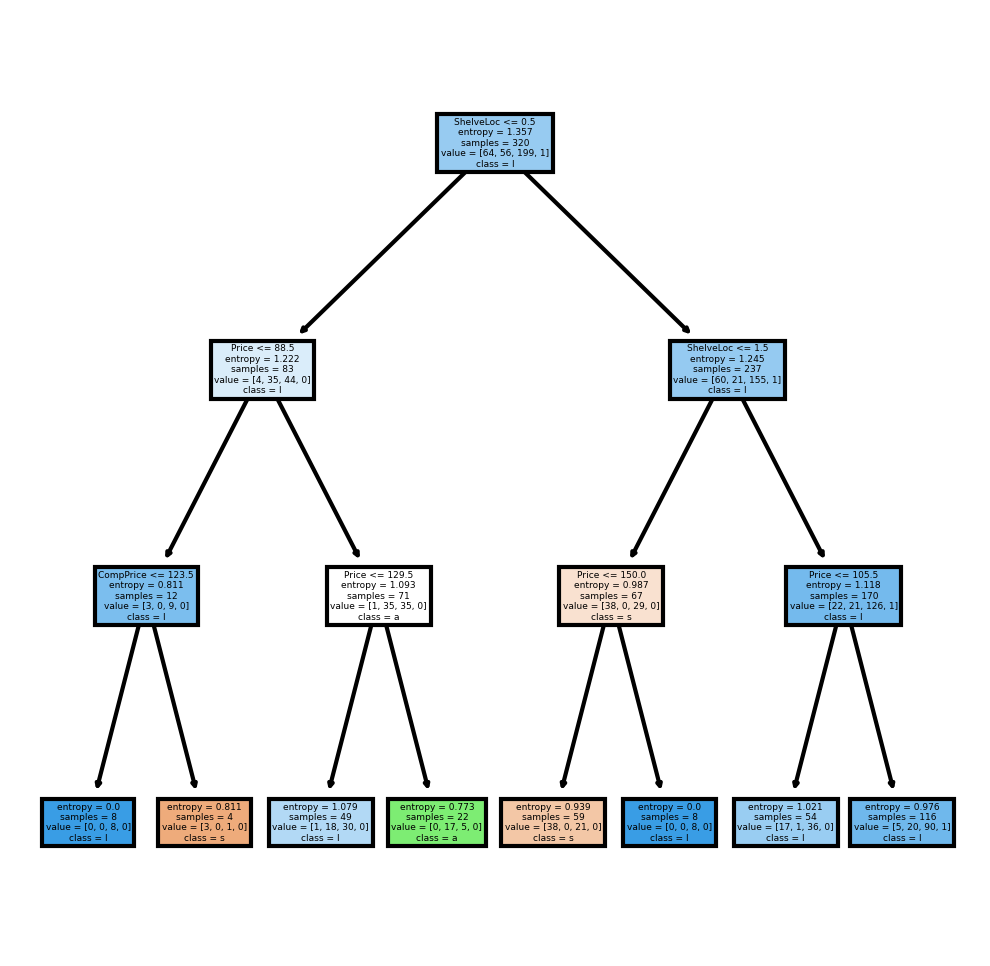

In [35]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = predictors, 
               class_names=target,
               filled = True); 

In [36]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

2    59
0    17
1     4
dtype: int64

In [37]:
pd.crosstab(y_test,preds)

col_0,0,1,2
salescat,,,
0,8,0,6
1,1,2,17
2,8,2,36


In [39]:
#accuracy
np.mean(preds==y_test)

0.575